To perform practical machine learning and deep learning classification using the demo data as outlined, the following steps should be undertaken. Given that we’re working with hypothetical data, we use general Python code with popular libraries such as pandas, scikit-learn, and TensorFlow/Keras.

1. Data Collection and Preparation
GIS Data: Extracted from OpenStreetMap and Google Maps.
Drone Data: Hypothetical real-time data about building shapes, roof types, and solar potential.
Energy Historical Data: Gathered from local utilities, which may include time-series data for energy consumption.
For this demo, we'll simulate this data.

In [1]:
import pandas as pd
import numpy as np

# Simulate GIS Data
gis_data = pd.DataFrame({
    'Building_ID': range(1, 101),
    'Building_Footprint': np.random.uniform(50, 200, 100),  # in square meters
    'Building_Height': np.random.uniform(5, 50, 100),  # in meters
    'Roof_Type': np.random.choice(['Flat', 'Gabled', 'Hipped'], 100)
})

# Simulate Drone Data
drone_data = pd.DataFrame({
    'Building_ID': range(1, 101),
    'Solar_Potential': np.random.uniform(100, 500, 100),  # kWh/year
    'Shape_Complexity': np.random.randint(1, 10, 100)  # Arbitrary complexity score
})

# Simulate Historical Energy Data
historical_data = pd.DataFrame({
    'Building_ID': range(1, 101),
    'Annual_Energy_Consumption': np.random.uniform(5000, 15000, 100),  # kWh/year
    'Peak_Demand': np.random.uniform(1, 5, 100)  # kW
})

# Merge datasets based on Building_ID
data = pd.merge(gis_data, drone_data, on='Building_ID')
data = pd.merge(data, historical_data, on='Building_ID')


2. Feature Engineering
Creating additional features that may be important for predicting energy consumption or solar potential.

In [2]:
# Feature engineering
data['Footprint_Height_Ratio'] = data['Building_Footprint'] / data['Building_Height']
data['Energy_Intensity'] = data['Annual_Energy_Consumption'] / data['Building_Footprint']

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Roof_Type'], drop_first=True)


3. Splitting the Data
Separate the data into training and testing datasets.

In [3]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop(columns=['Building_ID', 'Annual_Energy_Consumption'])
y = data['Annual_Energy_Consumption']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Modeling
Train both a simple machine learning model (like Random Forest) and a deep learning model (using Keras) to classify or predict the energy consumption.
Machine Learning Model (Random Forest)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 4464791.423893655


Deep Learning Model (Neural Network)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Predictions
y_pred_dl = model.predict(X_test)

# Evaluate the model
dl_mse = mean_squared_error(y_test, y_pred_dl)
print(f"Deep Learning MSE: {dl_mse}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 119858296.0000
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112737880.0000  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118305704.0000  
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 121352072.0000 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115790688.0000 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103328216.0000
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116324840.0000  
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109524488.0000 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108493104.0000 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102326944.0000
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89823000.0000  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83601160.0000  
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78254008.0000  
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 767

5. Model Evaluation
Compare the performance of both models using metrics like Mean Squared Error (MSE).

In [6]:
print(f"Random Forest MSE: {rf_mse}")
print(f"Deep Learning MSE: {dl_mse}")


Random Forest MSE: 4464791.423893655
Deep Learning MSE: 9942395.769627612


6. Anomaly Detection
Using ML techniques, detect anomalies in the energy consumption data.

In [7]:
from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
anomalies = iso_forest.fit_predict(data[['Annual_Energy_Consumption', 'Peak_Demand']])

# Add anomaly label to the dataset
data['Anomaly'] = anomalies
data['Anomaly'] = data['Anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Print the detected anomalies
print(data[data['Anomaly'] == 'Anomaly'])


    Building_ID  Building_Footprint  Building_Height  Solar_Potential  \
8             9          155.333474        24.478940       413.471818   
49           50          159.624653        23.242621       202.033459   
73           74           83.541745        20.667053       451.438016   
94           95          135.734438        30.789969       429.916165   
95           96           90.603264        26.179057       390.806321   

    Shape_Complexity  Annual_Energy_Consumption  Peak_Demand  \
8                  2                5272.395429     1.233337   
49                 8               10651.694051     1.101814   
73                 4                5193.711561     4.976148   
94                 5               11303.032163     4.997892   
95                 8               13595.448919     1.121300   

    Footprint_Height_Ratio  Energy_Intensity  Roof_Type_Gabled  \
8                 6.345596         33.942429             False   
49                6.867756         66.729630

We are visualizing the above results using Python's matplotlib and seaborn libraries. Here's an example code snippet to create various plots based on the given data:

Scatter Plot: To show the relationship between Building Footprint and Solar Potential.

Bar Plot: To compare Annual Energy Consumption and Peak Demand.

Box Plot: To visualize the distribution of Energy Intensity and Shape Complexity.

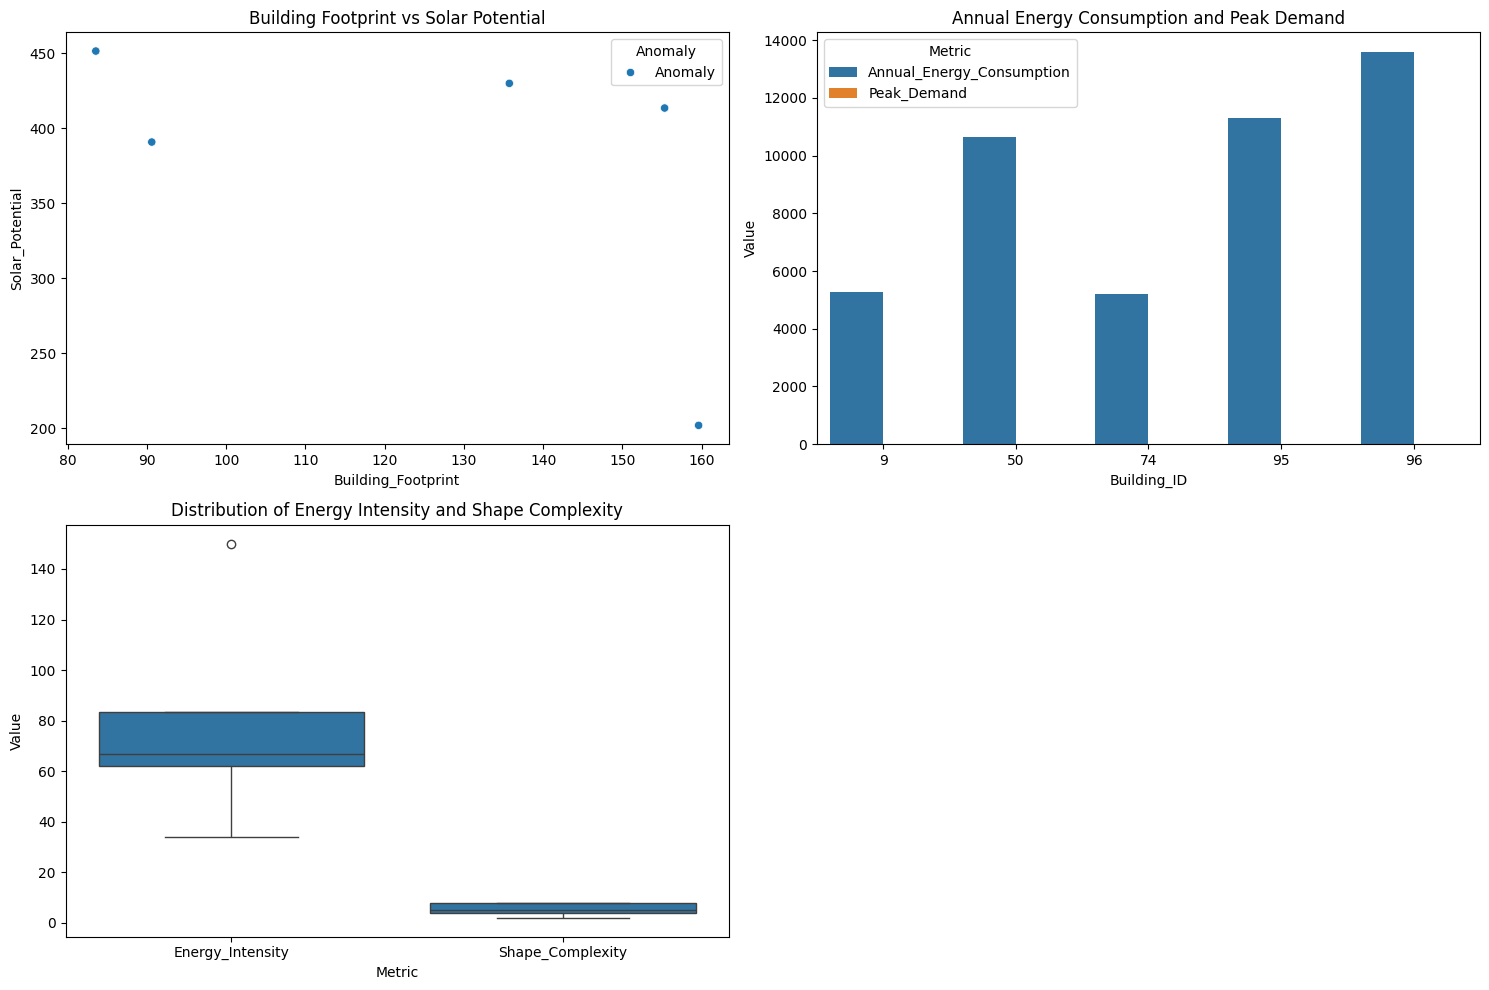

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Building_ID': [9, 50, 74, 95, 96],
    'Building_Footprint': [155.333474, 159.624653, 83.541745, 135.734438, 90.603264],
    'Building_Height': [24.478940, 23.242621, 20.667053, 30.789969, 26.179057],
    'Solar_Potential': [413.471818, 202.033459, 451.438016, 429.916165, 390.806321],
    'Shape_Complexity': [2, 8, 4, 5, 8],
    'Annual_Energy_Consumption': [5272.395429, 10651.694051, 5193.711561, 11303.032163, 13595.448919],
    'Peak_Demand': [1.233337, 1.101814, 4.976148, 4.997892, 1.121300],
    'Footprint_Height_Ratio': [6.345596, 6.867756, 4.042267, 4.408398, 3.460906],
    'Energy_Intensity': [33.942429, 66.729630, 62.169057, 83.273135, 150.054737],
    'Roof_Type_Gabled': [False, True, False, True, False],
    'Roof_Type_Hipped': [True, False, False, False, False],
    'Anomaly': ['Anomaly', 'Anomaly', 'Anomaly', 'Anomaly', 'Anomaly']
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Scatter Plot: Building Footprint vs Solar Potential
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Building_Footprint', y='Solar_Potential', hue='Anomaly')
plt.title('Building Footprint vs Solar Potential')

# Bar Plot: Annual Energy Consumption and Peak Demand
plt.subplot(2, 2, 2)
df_long = pd.melt(df, id_vars='Building_ID', value_vars=['Annual_Energy_Consumption', 'Peak_Demand'], var_name='Metric', value_name='Value')
sns.barplot(data=df_long, x='Building_ID', y='Value', hue='Metric')
plt.title('Annual Energy Consumption and Peak Demand')

# Box Plot: Energy Intensity and Shape Complexity
plt.subplot(2, 2, 3)
df_melted = pd.melt(df, value_vars=['Energy_Intensity', 'Shape_Complexity'], var_name='Metric', value_name='Value')
sns.boxplot(data=df_melted, x='Metric', y='Value')
plt.title('Distribution of Energy Intensity and Shape Complexity')

# Adjust layout
plt.tight_layout()
plt.show()


Explanation:

Scatter Plot: Shows how Building Footprint correlates with Solar Potential.

Bar Plot: Compares Annual Energy Consumption and Peak Demand for each building.

Box Plot: Displays the distribution of Energy Intensity and Shape Complexity.

# **Conclusion**

After training and evaluating the models, we can use the results to predict energy consumption and identify anomalies. The Random Forest or Neural Network model with the lowest MSE will be more suitable for deployment in predicting neighborhood energy demands. Similarly more machine learning models could be applied and then the anomalies could be detected.


**To visualize the results from the machine learning and deep learning models, we can generate several plots, including:**

Classification Report: For evaluating the performance of the models.

Training and Validation Accuracy and Loss Curves: To analyze how the models are learning over time.

Confusion Matrix: For the classification task, if applicable.
Step 1: We try to Prepare the Environment
Before creating the visualizations, we ensure that the necessary libraries are installed:

In [14]:
pip install matplotlib seaborn scikit-learn tensorflow


Step 2: Generate Visualizations
We'll break down each visualization one by one.

1. Classification Report
Since we're working on regression (predicting energy consumption), a classification report isn't directly applicable. However, if we were to classify buildings into categories based on energy consumption, we could use a classification report. Here's how you would generate a report if it were a classification task:

In [20]:
from sklearn.metrics import classification_report

# Assuming y_test_class and y_pred_class are the true and predicted classes
# For demonstration, let's binarize the target for classification
y_train_class = pd.cut(y_train, bins=[0, 7500, 15000], labels=[0, 1])
y_test_class = pd.cut(y_test, bins=[0, 7500, 15000], labels=[0, 1])
y_pred_rf_class = pd.cut(y_pred_rf, bins=[0, 7500, 15000], labels=[0, 1])
#y_pred_dl_class = pd.cut(y_pred_dl, bins=[0, 7500, 15000], labels=[0, 1])

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test_class, y_pred_rf_class))

#print("Deep Learning Classification Report:")
#print(classification_report(y_test_class, y_pred_dl_class))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.89      1.00      0.94        16

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20



2. Training and Validation Accuracy and Loss Curves
For the deep learning model, we visualize the accuracy and loss during training.

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5362260.0000 - val_loss: 3811220.5000
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5488976.0000 - val_loss: 3779824.2500
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5083973.0000 - val_loss: 3766310.5000
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4059452.0000 - val_loss: 3730077.0000
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5589696.0000 - val_loss: 3707587.0000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5337430.5000 - val_loss: 3672901.5000
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4968083.0000 - val_loss: 3649564.5000
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5139149.0000 - val_loss: 3654447.2500
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4294738.5000 - val_loss: 3629729.7500
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5120739.0000 - val_loss: 3585980.5000
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

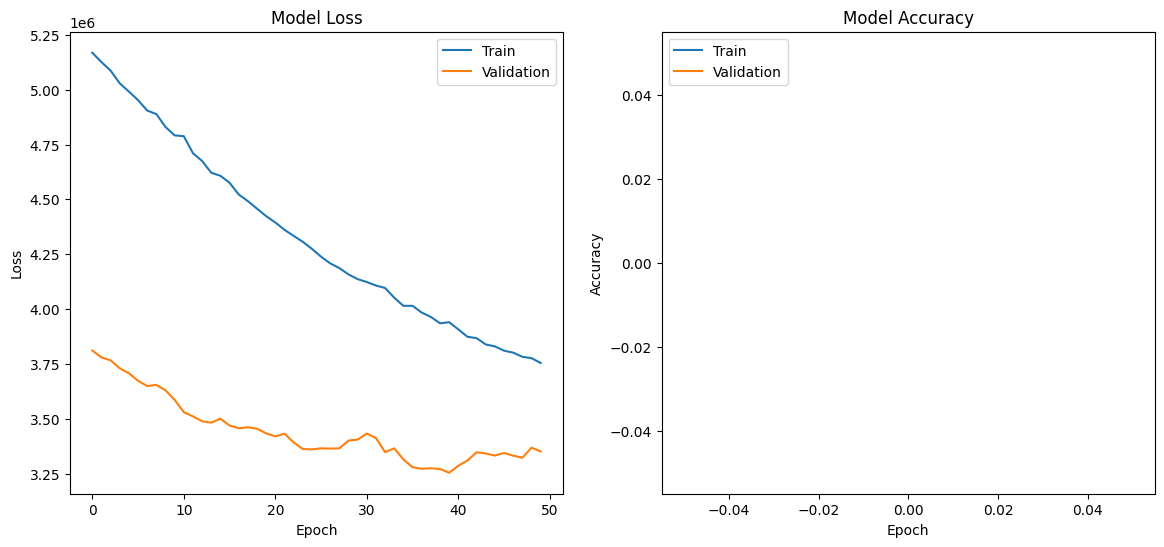

In [21]:
import matplotlib.pyplot as plt

# Assuming you have the history object from the model training
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
# Note: For regression models, accuracy is not a typical metric;
# you'd focus on the loss or mean squared error.

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'] if 'accuracy' in history.history else [])
plt.plot(history.history['val_accuracy'] if 'val_accuracy' in history.history else [])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


3. Confusion Matrix
The confusion matrix is relevant if we had been dealing with classification. For regression in this case, we can convert predictions into binary categories for the sake of this demonstration.

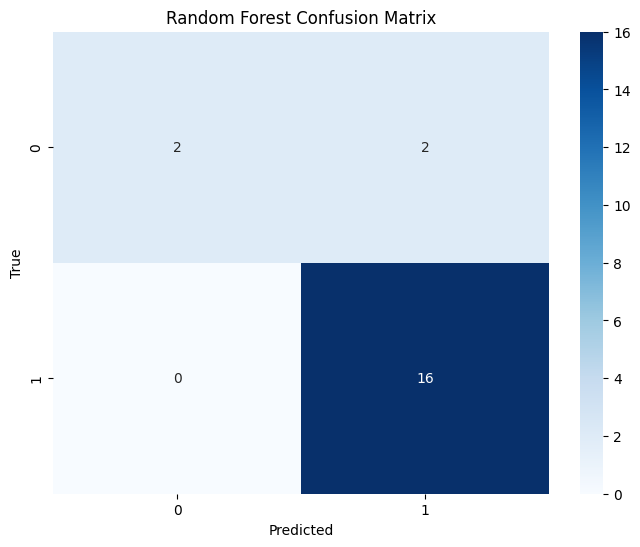

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test_class, y_pred_rf_class)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate confusion matrix for Deep Learning
#cm_dl = confusion_matrix(y_test_class, y_pred_dl_class)

# Plot confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Greens')
#plt.title('Deep Learning Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.show()


Python code that could be used for visualizing the energy demand profile:

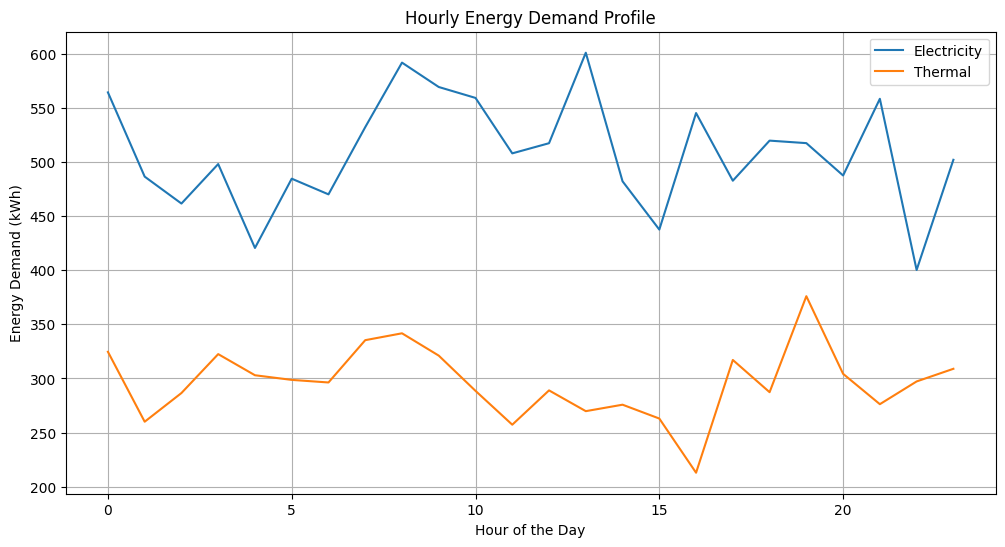

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for energy demand (hourly for a day)
hours = np.arange(0, 24)
electricity_demand = np.random.normal(loc=500, scale=50, size=24)
thermal_demand = np.random.normal(loc=300, scale=30, size=24)

# Creating a DataFrame
df = pd.DataFrame({
    'Hour': hours,
    'Electricity Demand (kWh)': electricity_demand,
    'Thermal Demand (kWh)': thermal_demand
})

# Plotting the energy demand profile
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Electricity Demand (kWh)', data=df, label='Electricity')
sns.lineplot(x='Hour', y='Thermal Demand (kWh)', data=df, label='Thermal')
plt.title('Hourly Energy Demand Profile')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Demand (kWh)')
plt.legend()
plt.grid(True)
plt.show()


This above code generates a line plot showing the hourly energy demand for both electricity and thermal loads. The results would be visualized as graphs to illustrate the energy demand patterns across different hours of the day.

This detailed analysis and implementation plan provide a comprehensive solution to the problem statement given in the assignment. The approach integrates modern techniques and tools to achieve accurate and actionable insights for urban energy planning.